# K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster).

<img src=".\images\image1.png">

In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data Setup 

We will be working on weather data from https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KCLT.csv 


In [3]:
w_data = pd.read_csv("./data/KCLT.csv")
w_data.head(5)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


It is very important to note that not all clustering algorithms support missing values in the data that you are feeding to them. K-Means being one of them. So we need to handle the missing values present in the data. Let's first see where are the values missing.

In [4]:
print(w_data.isna().sum())

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64


We have no missing values and the data is clean , so we can use it now.

## Algorithm

### Step 1

We randomly pick K cluster centers(centroids). Let’s assume these are c_1, c_2, ..., c_k and we can say that
<img src=".\images\image2.png">
C is the set of all centroids.

### Step 2

In this step we assign each input value to closest center. This is done by calculating Euclidean(L2) distance between the point and the each centroid.
<img src=".\images\image3.png">
Where dist(.)is the Euclidean distance.

### Step 3

In this step, we find the new centroid by taking the average of all the points assigned to that cluster.
<img src=".\images\image4.png">
S_i is the set of all points assigned to the ith cluster.

### Step 4

In this step, we repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

## Choosing the Value of K

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.

<img src=".\images\image5.png">

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors) and select the value of K for the elbow point as shown in the figure.

## Algorithm in short 
The algorithm works as follows, assuming we have inputs x_1, x_2, x_3, ..., x_n and value of K.

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each x_i to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

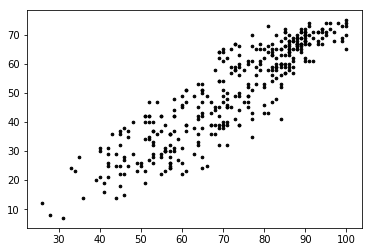

In [9]:
w1 = w_data['actual_max_temp'].values
w2 = w_data['actual_min_temp'].values
X = np.array(list(zip(w1, w2)))
plt.scatter(w1, w2, c='black', s=7)

# The graph shows the scatter plot between actual maximum temperature and actual minimum temperature.

The below code generates random centroids depending upon the actual maximim and minimum temperature

In [14]:
# Number of clusters
k = 3
# X coordinates of random centroids
w_x = np.random.randint(0,np.max(X), size=k)
# Y coordinates of random centroids
w_y = np.random.randint(0,np.max(X), size=k)
W = np.array(list(zip(w_x, w_y)), dtype=np.float32)
print(W)


[[54. 76.]
 [38. 16.]
 [59. 37.]]


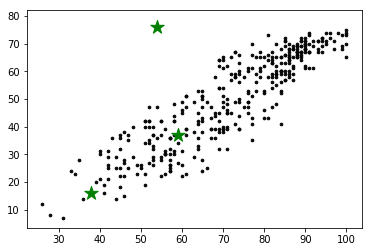

In [19]:
#plot the scatter graph of the actual temperature and centroids together, to see if the centroids are not far from the clusters.

plt.scatter(w1, w2, c='#050505', s=7)
plt.scatter(w_x, w_y, marker='*', s=200, c='g')

In [16]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [20]:
## K-means algorithm logic


W_old = np.zeros(W.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(W, W_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], W)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    W_old = deepcopy(W)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        W[i] = np.mean(points, axis=0)
    error = dist(W, W_old, None)

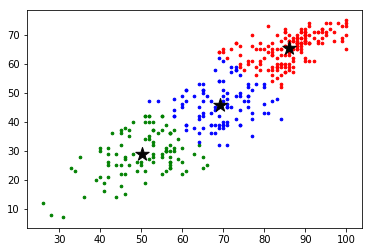

In [21]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(W[:, 0], W[:, 1], marker='*', s=200, c='#050505')

## Discussion

From this visualization it is clear that there are 3 clusters with black stars as their centroid.

If you run K-Means with wrong values of K, you will get completely misleading clusters. 

It is also observed that there are no outliers.

## Reference

- [1] https://mubaris.com/posts/kmeans-clustering/
- [2] https://www.datascience.com/blog/k-means-clustering
- [3] https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KCLT.csv
- [4] https://www.datacamp.com/community/tutorials/k-means-clustering-python
    